# OCR 실습

In [32]:
import requests # 리퀘스트 모듈 사용
from PIL import Image # 파이썬 이미지 라이브러리안에 있는 이미지 처리 모듈 사용
from io import BytesIO # 입출력 라이브러리 안에 바이너리 처리 모듈 사용
import matplotlib.pyplot as plt # atplotlib 라이브러리 안에 있는 pyplot 모듈 사용
# MATLAB과 비슷하게 명령어 스타일로 동작하는 함수의 모음 
# matplotlib.pyplot 모듈의 각각의 함수를 사용해서 간편하게 그래프를 만들고 변화를 줄 수 있음

In [33]:
subscription_key = '234a97e32f8447c19fbf3836053ff32c' # MS Azure API 서비스 사용하기위한 구독 키값 저장

In [34]:
vision_base_url = 'https://daeguaivision00.cognitiveservices.azure.com/vision/v2.0/' # MS Azure API 서비스 URL 저장

In [35]:
ocr_url = vision_base_url + 'ocr' # 도메인주소에 OCR 사용 명시된 값 저장

## 분석할 이미지를 셋팅한다

In [43]:
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYDWOSiIgk2LOUmbN8aH3CdWcTMxiMwU-e7g&usqp=CAU'
# 이미지 주소 저장

In [44]:
img = Image.open(BytesIO(requests.get(image_url).content))
# GET 방식으로 이미지를 요청해서 받은 응닶값의 content를 바이너리 조작하여 이미지를 연 결과를 저장

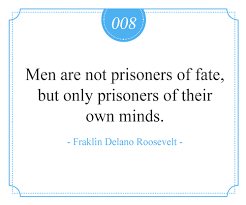

In [45]:
img

In [51]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key} # 사전형 리스트 매핑
params  = {'language': 'unk', 'detectOrientation': 'true'} 
# 언어 파라미터는 알 수 없음으로 설정하면 자동으로 검색하여 매칭
# OCR 서비스는 이미지 방향을 감지하고 추가 처리 전에 수정하려고 시도
data    = {'url': image_url} # 이미지 주소 사전형 리스트로 저장

In [47]:
response = requests.post(ocr_url,headers=headers, params=params, json=data)
# API 주소에 파라미터 값 지정하여 POST 방식으로 리퀘스트 요청하고 응답값 저장

In [52]:
analysis = response.json() # 저장된 응닶값 Json 형식으로 처리하여 저장

In [54]:
analysis # 출력

{'language': 'en',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '26,17,198,128',
   'lines': [{'boundingBox': '112,17,24,12',
     'words': [{'boundingBox': '112,17,24,12', 'text': '008'}]},
    {'boundingBox': '26,68,198,16',
     'words': [{'boundingBox': '26,68,30,12', 'text': 'Men'},
      {'boundingBox': '61,72,20,8', 'text': 'are'},
      {'boundingBox': '86,70,20,10', 'text': 'not'},
      {'boundingBox': '111,68,61,16', 'text': 'prisoners'},
      {'boundingBox': '177,68,16,12', 'text': 'of'},
      {'boundingBox': '196,68,28,15', 'text': 'fate,'}]},
    {'boundingBox': '38,88,174,17',
     'words': [{'boundingBox': '38,89,21,12', 'text': 'but'},
      {'boundingBox': '64,89,29,16', 'text': 'only'},
      {'boundingBox': '98,89,61,16', 'text': 'prisoners'},
      {'boundingBox': '164,88,15,13', 'text': 'of'},
      {'boundingBox': '182,89,30,12', 'text': 'their'}]},
    {'boundingBox': '86,109,77,13',
     'words': [{'boundingBox': '86,113,28,9', 'text'

In [56]:
line_infos = [region["lines"] for region in analysis["regions"]] 
# "regions" 항목의 내용이 끝날때까지 region에 저장하고 내용 안에 Lines 항목에 내용을 line_infos 저장
word_infos = [] # 배열 또는 리스트 변수 생성
for line in line_infos: # line_infos변수에 있는 내용이 끝날때까지 line변수에 저장
    for word_metadata in line: # line변수의 내용이 끝날때까지 word_metadata에 저장
        for word_info in word_metadata["words"]:#Words 항목 저장
            word_infos.append(word_info) # Word의 내용을 word_infos에 사전형 리스트로 저장
word_infos
# 해당 항목으로 가기위해서 계층적으로 저장할 수 밖에 없어서 반복문을통해 한계층씩 내려가서 Word항목들만 새로운 사전형 리스트에 추가

[{'boundingBox': '112,17,24,12', 'text': '008'},
 {'boundingBox': '26,68,30,12', 'text': 'Men'},
 {'boundingBox': '61,72,20,8', 'text': 'are'},
 {'boundingBox': '86,70,20,10', 'text': 'not'},
 {'boundingBox': '111,68,61,16', 'text': 'prisoners'},
 {'boundingBox': '177,68,16,12', 'text': 'of'},
 {'boundingBox': '196,68,28,15', 'text': 'fate,'},
 {'boundingBox': '38,89,21,12', 'text': 'but'},
 {'boundingBox': '64,89,29,16', 'text': 'only'},
 {'boundingBox': '98,89,61,16', 'text': 'prisoners'},
 {'boundingBox': '164,88,15,13', 'text': 'of'},
 {'boundingBox': '182,89,30,12', 'text': 'their'},
 {'boundingBox': '86,113,28,9', 'text': 'own'},
 {'boundingBox': '119,109,44,13', 'text': 'minds.'},
 {'boundingBox': '67,142,3,1', 'text': '-'},
 {'boundingBox': '74,138,28,7', 'text': 'Fmklin'},
 {'boundingBox': '180,142,2,1', 'text': '-'}]